In [1]:
# pip install tensorflow

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential()

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation

In [7]:
model.add(Conv2D(32, (3,3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [8]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())

In [9]:
from tensorflow.keras.layers import Dense, Dropout

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 activation (Activation)     (None, 248, 248, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      4624      
                                                                 
 activation_1 (Activation)   (None, 122, 122, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                    

In [11]:
model.compile (
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=15,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale= 1/255
)

In [14]:
batch_size = 10

In [15]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/train/',
    target_size= (250, 250),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'Dataset/validation/',
    target_size= (250, 250),
    batch_size=batch_size,
    class_mode='binary'
)

Found 248 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [16]:
model.fit_generator(
    train_generator,
    steps_per_epoch= 248//batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps= 208 // batch_size
)

Epoch 1/50
24/24 [==============================] - 15s 568ms/step - loss: 0.6977 - accuracy: 0.4958 - val_loss: 0.6917 - val_accuracy: 0.8600
Epoch 2/50
24/24 [==============================] - 13s 551ms/step - loss: 0.6958 - accuracy: 0.4958 - val_loss: 0.6902 - val_accuracy: 0.7150
Epoch 3/50
24/24 [==============================] - 13s 552ms/step - loss: 0.7012 - accuracy: 0.5504 - val_loss: 0.6839 - val_accuracy: 0.4950
Epoch 4/50
24/24 [==============================] - 13s 559ms/step - loss: 0.6715 - accuracy: 0.5882 - val_loss: 0.6734 - val_accuracy: 0.4950
Epoch 5/50
24/24 [==============================] - 14s 592ms/step - loss: 0.6830 - accuracy: 0.6471 - val_loss: 0.5982 - val_accuracy: 0.7100
Epoch 6/50
24/24 [==============================] - 14s 581ms/step - loss: 0.6095 - accuracy: 0.6807 - val_loss: 0.4855 - val_accuracy: 0.8500
Epoch 7/50
24/24 [==============================] - 14s 572ms/step - loss: 0.5400 - accuracy: 0.7395 - val_loss: 0.4001 - val_accuracy: 0.8050

In [17]:
 model.save('model.hdf5')

In [18]:
from keras.models import load_model

In [21]:
image_name = 'abc.png'

In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img(image_name)
x = img_to_array(img.resize([250,250]))
x = x.reshape((1,) + x.shape)

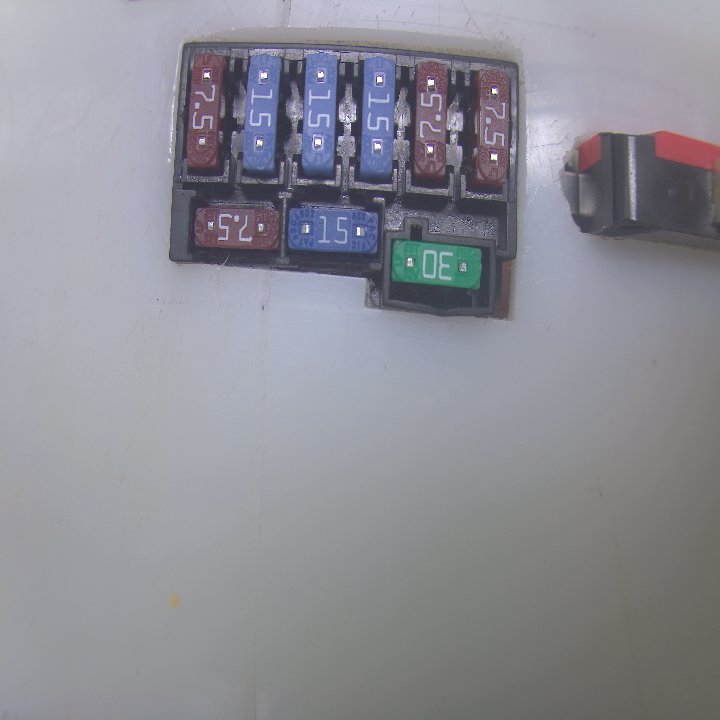

In [23]:
img

In [24]:
if (model.predict(x) <= 0.5).astype("int32") == 0:
  print ('Ok')
else:
  print ('Not Good')

1/1 [==============================] - 0s 157ms/step
Ok
